In [41]:
import numpy as np 
import pandas as pd
import cv2 
from matplotlib import pyplot as plt 
from pylab import imread
from skimage.color import rgb2gray

In [42]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):
  # Convert ImageData and LabelData to List
  from matplotlib import pyplot as plt
  ImageArray = list(ImageData)
  LabelArray = list(LabelData)
  if(rows == 1 & cols == 1):
    fig = plt.figure(figsize=(20,20))
  else:
    fig = plt.figure(figsize=(cols*8,rows*5))
        
  for i in range(1, cols * rows + 1):
      fig.add_subplot(rows, cols, i)
      image = ImageArray[i - 1]
      # If the channel number is less than 3, we display as grayscale image
      # otherwise, we display as color image
      if (len(image.shape) < 3):
          plt.imshow(image, plt.cm.gray)
          plt.grid(gridType)
      else:
          plt.imshow(image)
          plt.grid(gridType)
      plt.title(LabelArray[i - 1])
  plt.show()

def ShowThreeImages(IM1, IM2, IM3):
    imshows([IM1, IM2, IM3], ["Image 1","Image 2", "Image 3"], 1, 3)
def ShowTwoImages(IM1, IM2):
    imshows([IM1, IM2], ["Image 1","Image 2"], 1, 2)
def ShowOneImage(IM):
    imshows([IM], ["Image"], 1, 1)
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listImage)):
        listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)

# Câu 1:


### Tạo ảnh grayscale

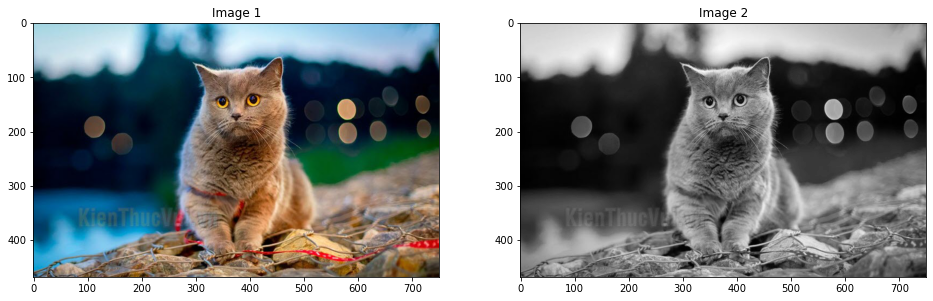

In [43]:
# Read Image 
image_color = imread("kitty.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowTwoImages(image_color, image_gray)

### Tạo ảnh HSV và hiển thị các kênh hue, saturation và value

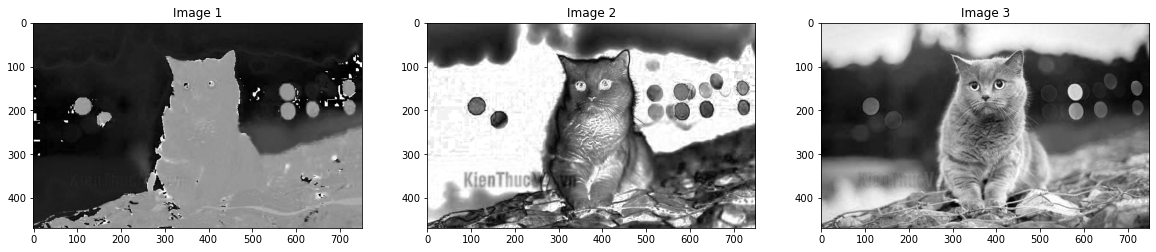

In [44]:
# Convert Image into HSV color spaces
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_BGR2HSV)

# Show each channel H , S and V
ShowThreeImages(image_hsv[:,:,0],image_hsv[:,:,1],image_hsv[:,:,2])

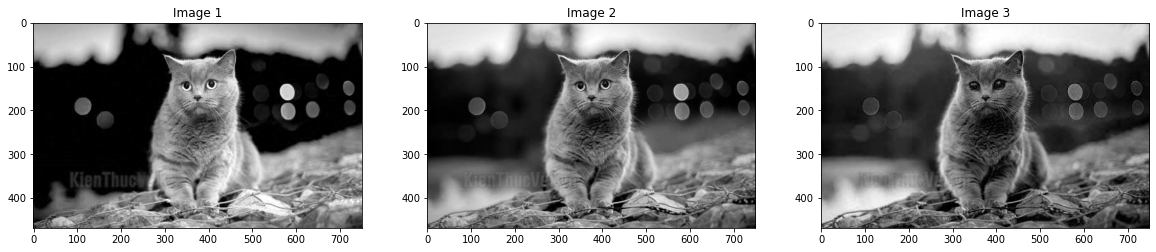

In [45]:
# Show each channel R, G, and B
ShowThreeImages(image_color[:,:,0],image_color[:,:,1],image_color[:,:,2])

### Chọn ngưỡng hue để trích xuất đối tượng chủ đạo trong ảnh (hiển thị ảnh màu đối tượng sau khi trích xuất)

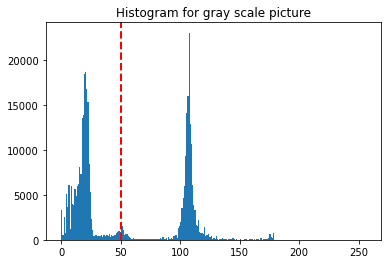

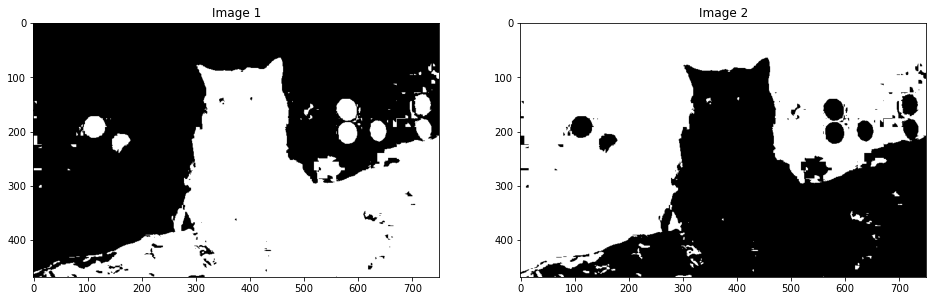

In [46]:
hue_img = image_hsv[:,:,0]
hue_threshold = 50

# Show Histogram of Hue Channel
hist = cv2.calcHist([hue_img],[0],None,[256],[0,256])
plt.hist(hue_img.ravel(),256,[0,256])
plt.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram for gray scale picture')
plt.show()

# Use threshold to segment object by histogram
hue_binary01 = hue_img > hue_threshold
hue_binary02 = 1 - hue_binary01

ShowTwoImages(hue_binary01, hue_binary02)

### Hiển thị histogram của 3 kênh màu h,s,v và r,g,b 

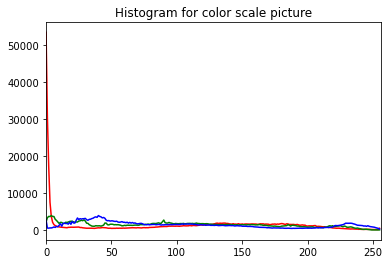

In [47]:
color = ('r', 'g', 'b')
for channel,col in enumerate(color):
    histr = cv2.calcHist([image_color],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

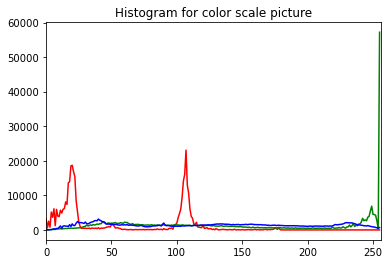

In [48]:
color = ('r', 'g', 'b')
for channel,col in enumerate(color):
    histr = cv2.calcHist([image_hsv],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

# Câu 2

### Tạo ảnh xám từ ảnh màu

In [75]:
# Read Image 
image_color = imread("corgi.jpg")

# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowTwoImages(image_color, image_gray)

### Làm mờ ảnh

In [76]:
# Create Blurred Image
from skimage.filters.rank import median
from skimage.morphology import disk

image_blurred = median(image_gray, disk(10))
ShowTwoImages(image_gray, image_blurred)

### Làm nhiễu ảnh

In [77]:
# Create Noise Image
noise = np.random.random(image_gray.shape)
image_noise = image_gray.copy()
image_noise[noise > 0.99] = 255
image_noise[noise < 0.01] = 0

ShowThreeImages(image_gray, noise, image_noise)

### Hiển thị histogram của ảnh xám và cân bằng histogram, hiển thị ảnh sau khi cân bằng

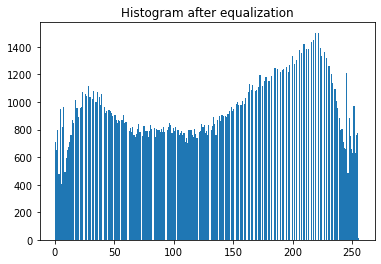

In [78]:
from skimage import data, exposure
image_equalization = exposure.equalize_hist(image_gray)
image_equalization = np.float32(image_equalization * 255)
ShowTwoImages(image_gray, image_equalization)

hist = cv2.calcHist([image_gray],[0],None,[256],[0,256])
plt.hist(image_gray.ravel(),256,[0,256])
plt.title('Histogram before equalization')
plt.show()

hist = cv2.calcHist([image_equalization],[0],None,[256],[0,256])
plt.hist(image_equalization.ravel(),256,[0,256])
plt.title('Histogram after equalization')
plt.show()

### Cân bằng 3 kênh màu hsv cùng lúc và hiển thị ảnh kết quả sau khi cân bằng

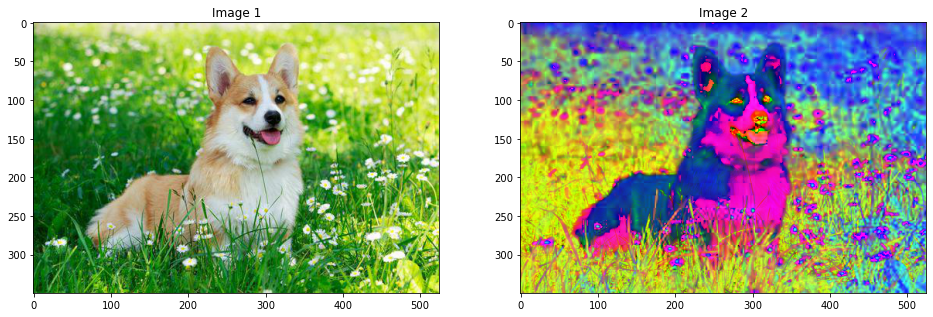

In [79]:
# Convert Image into HSV color spaces
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_RGB2HSV)
# Apply histogram equalization
channel = 0
image_hsv[:, :, channel] = cv2.equalizeHist(image_hsv[:, :, channel])
channel = 1
image_hsv[:, :, channel] = cv2.equalizeHist(image_hsv[:, :, channel])
channel = 2
image_hsv[:, :, channel] = cv2.equalizeHist(image_hsv[:, :, channel])
# Show image after euqalization hsv
ShowTwoImages(image_color, image_hsv)

### Enhance ảnh bằng cách cân bằng histogram kênh s và v

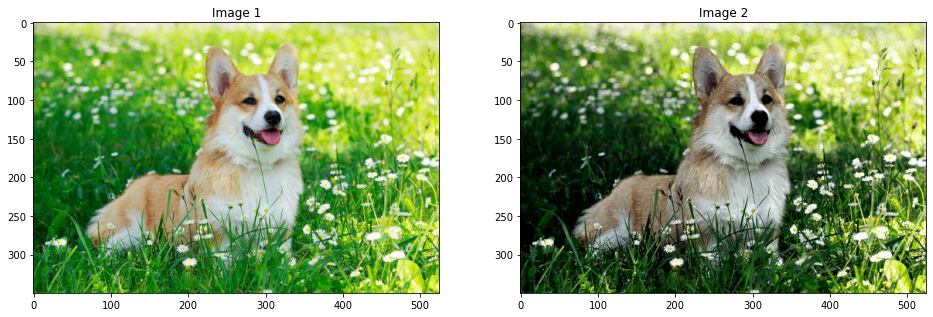

In [82]:
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_RGB2HSV)

channel = 1
image_hsv[:, :, channel] = cv2.equalizeHist(image_hsv[:, :, channel])
channel = 2
image_hsv[:, :, channel] = cv2.equalizeHist(image_hsv[:, :, channel])

image_enhanced = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
ShowTwoImages(image_color, image_enhanced)

### Thực hiện các biến đổi gamma và hiển thị ảnh màu tương ứng

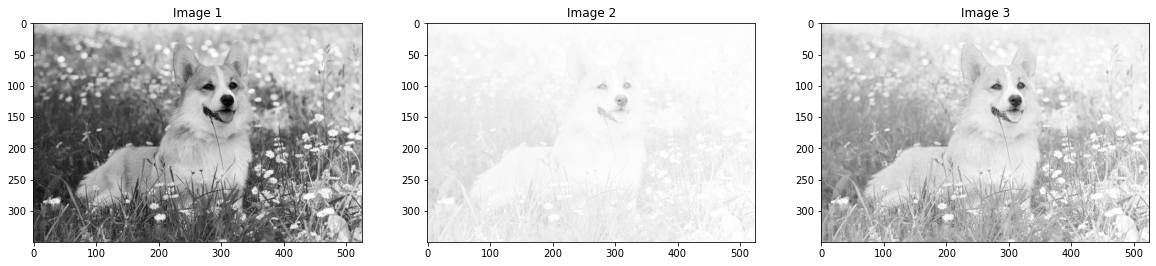

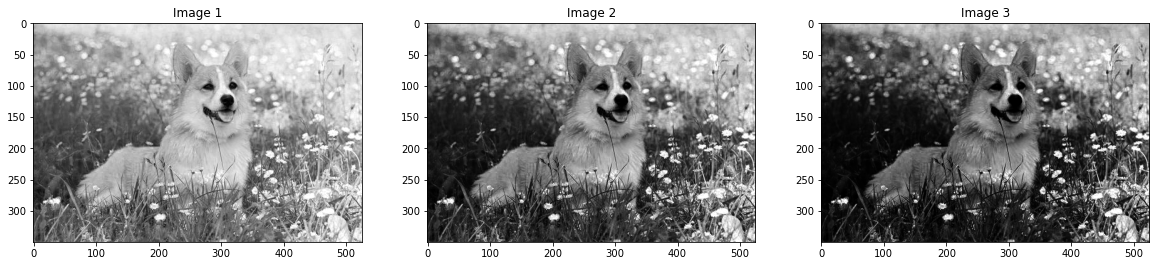

In [83]:
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_RGB2HSV)
img = image_hsv[:,:,2]
gamma = [0.1, 0.5, 1.2, 2.2, 3.2]
gamma_corrected_01 = np.array(255*(img / 255) ** gamma[0], dtype = 'uint8') 
gamma_corrected_02 = np.array(255*(img / 255) ** gamma[1], dtype = 'uint8') 
gamma_corrected_03 = np.array(255*(img / 255) ** gamma[2], dtype = 'uint8') 
gamma_corrected_04 = np.array(255*(img / 255) ** gamma[3], dtype = 'uint8')
gamma_corrected_05 = np.array(255*(img / 255) ** gamma[4], dtype = 'uint8')
ShowThreeImages(image_gray, gamma_corrected_01, gamma_corrected_02)
ShowThreeImages(gamma_corrected_03, gamma_corrected_04, gamma_corrected_05)

###  Chọn ngưỡng mức tối và ngưỡng mức sáng mà ở đó dưới mức tối sẽ cho tối hơn và trên mức sáng sẽ cho sáng hơn trên kênh màu value trong hsv. Sau đó hiển thị ảnh kết quả sau khi enhance 

In [84]:
def pixelValTransformation(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 

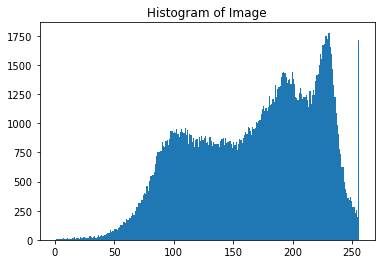

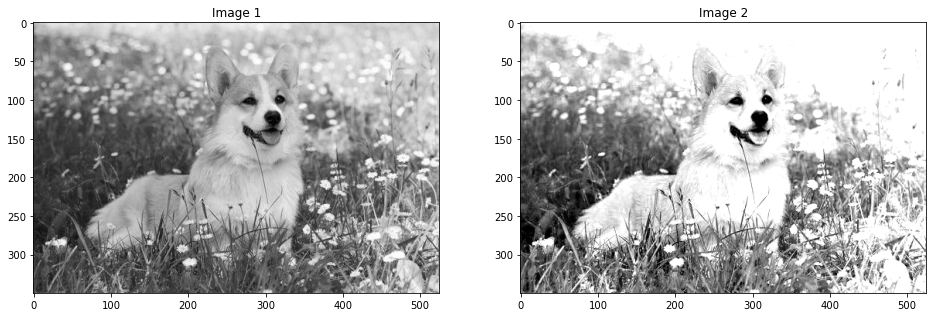

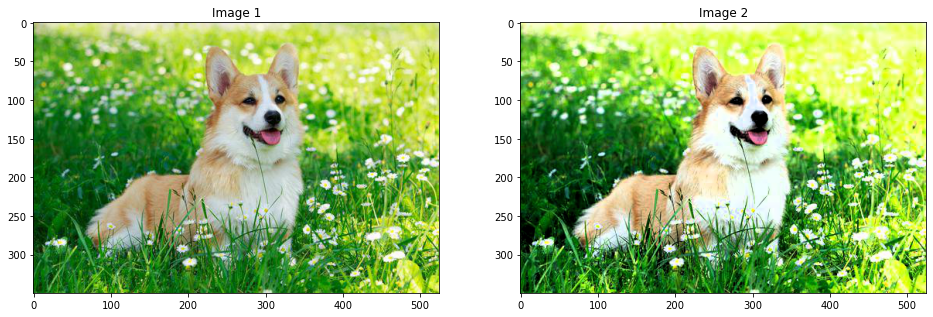

In [85]:
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_RGB2HSV)
image_hsv_value = image_hsv[:,:,2]

hist = cv2.calcHist([image_hsv_value],[0],None,[256],[0,256])
plt.hist(image_hsv_value.ravel(),256,[0,256])
plt.title('Histogram of Image')
plt.show()

# Define parameters. 
r1 = 50
s1 = 0
r2 = 200
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelValTransformation) 
# Apply contrast stretching. 
contrast_stretched = pixelVal_vec(image_hsv_value, r1, s1, r2, s2) 

image_hsv[:,:,2] = contrast_stretched
image_enhanced = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

ShowTwoImages(image_gray, contrast_stretched)
ShowTwoImages(image_color, image_enhanced)

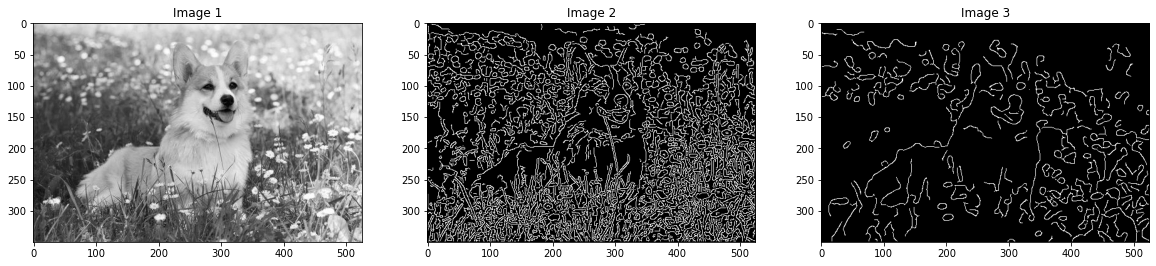

In [86]:
from skimage import feature
# sigma help to remove the noisy image in edge detection
image_edges_01 = feature.canny(image_gray)
image_edges_02 = feature.canny(image_gray, sigma=3)
ShowThreeImages(image_gray, image_edges_01, image_edges_02)